In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
restaurants = pd.read_csv("Future50.csv")
restaurants.shape

(50, 9)

In [ ]:
restaurants

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes
5,6,Playa Bowls,"Belmar, N.J.",39,62.9%,76,28.8%,580,Yes
6,7,The Simple Greek,"Blue Bell, Pa.",24,52.5%,36,33.3%,775,Yes
7,8,Melt Shop,"New York, N.Y.",20,39.6%,19,35.7%,1260,Yes
8,9,Creamistry,"Yorba Linda, Calif.",24,36.8%,60,27.7%,465,Yes
9,10,Joella's Hot Chicken,"Louisville, Ky.",29,35.5%,17,30.8%,1930,No


In [ ]:
lookup_franchize= dict(zip(restaurants.Franchising.unique(),restaurants.Franchising.unique()))
lookup_franchize

{'No': 'No', 'Yes': 'Yes'}

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
X = restaurants[['Rank','Unit_Volume','Units']]
y = restaurants['Franchising']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 0)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn.score(X_test, y_test)

0.7692307692307693

In [ ]:
rest_prediction = knn.predict([[1,1150,26]])
lookup_franchize[rest_prediction[0]]

'No'

([<matplotlib.axis.XTick at 0x7f909ccb31d0>,
 <a list of 5 Text major ticklabel objects>)

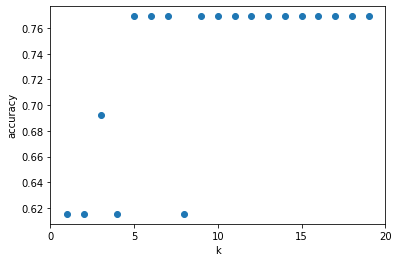

In [ ]:
k_range = range(1,20)
scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  scores.append(knn.score(X_test,y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,5,10,15,20])